In [68]:
import tensorflow as tf 
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [31]:
#gpu setup
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


In [16]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Removing Unwantend Imgaes

In [69]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [70]:
data = 'data'
image_exts = ['jpeg','jpg','bmp','png']

In [71]:
os.listdir(os.path.join(data , 'happy'))

['images31.jpg',
 'image15.jpeg',
 'images9.jpg',
 'o-HAPPY-facebook.jpg',
 'images6.jpg',
 'hqdefault.jpg',
 'image32.png',
 '8cxKy5g9i.jpg',
 'Screen-Shot-2012-10-23-at-12.57.22-PM.png',
 'image30.jpeg',
 '1-2.jpg',
 'images34.jpg',
 'happinessa.jpg',
 'images2.jpg',
 'HAPPY-PEOPLE-CLUB-LOGO.jpg',
 'happy-person.jpeg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'images7.jpg',
 'images12.jpg',
 'image31.jpeg',
 'happy-people-vector-29209040.jpg',
 'image16.jpeg',
 'image4.jpeg',
 '11-Habits-of-Truly-Happy-People.jpg',
 'images27.jpg',
 'jumping_for_joy_for_3_kinds_of_happy_people.jpg',
 'the-habits-of-happy-people-a-meditation-day-course-611337.jpg',
 'images19.jpg',
 'happy-people-14410042.jpg',
 'images.jpg',
 'maxresdefault2.jpg',
 'images25.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed.jpg',
 'images13.jpg',
 'Top-Secrets-of-How-to-be-Happy.jpg',
 'happy-people-black-and-white-720x360.jpg',
 'image10.jpeg',
 'goup-happy-people-group-jumping-isolate

In [72]:
os.listdir(os.path.join(data , 'sad'))

['images31.jpg',
 'getty_501650894_118886.jpg',
 'image15.jpeg',
 'images9.jpg',
 'images51.jpg',
 'image-20160914-4963-19knfh1.jpg',
 'images6.jpg',
 'vh6to.jpg',
 'fTw5aVC5_400x400.jpg',
 'image32.png',
 'sad-people-icon-2CCHXB2.jpg',
 'sad-woman.jpg',
 'person-super-depressed.jpg',
 'Crying-girl.jpg',
 'sad-people-vector-26812552.jpg',
 'images34.jpg',
 'images2.jpg',
 '51079685_M.jpg',
 '6-Best-and-worst-things-to-say.jpg',
 'sad-people.jpg',
 'images7.jpg',
 'images12.jpg',
 'images46.jpg',
 'images38.jpg',
 'DD-blogpost-SAD-940x492.png',
 'images41.jpg',
 'image16.jpeg',
 'sad-person-concept-vector-26538685.jpg',
 'Depressed-woman-covering-her-eyes.jpg',
 'image4.jpeg',
 'images27.jpg',
 'images40.jpg',
 'images19.jpg',
 'images.jpg',
 'sad-human-figure-depression-concept-drawing-frank-ramspott.jpg',
 'maxresdefault2.jpg',
 'images25.jpg',
 'images13.jpg',
 '405-4050267_sad-people-png-sad-person-transparent-background-png.png',
 'sad-talks-for-sad-people-fb13.png',
 'images50.jpg

In [73]:
img33 = cv2.imread(os.path.join(data , 'happy' , 'images33.jpg'))

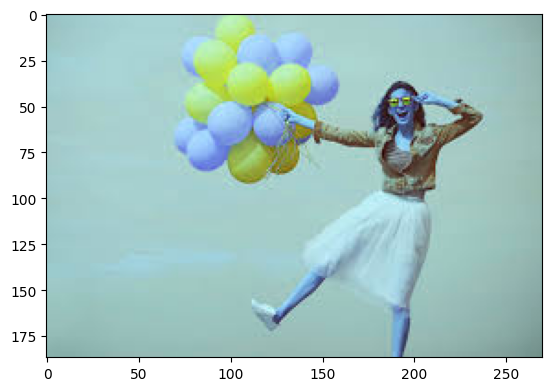

In [74]:
plt.imshow(img33)
plt.show()

In [23]:
#script for removing unwanted imgages

for image_class in os.listdir(data): 
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


## Loading Dataset

In [24]:
import numpy as np

In [25]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [26]:
data_iterator = data.as_numpy_iterator()

In [29]:
batch = data_iterator.next()

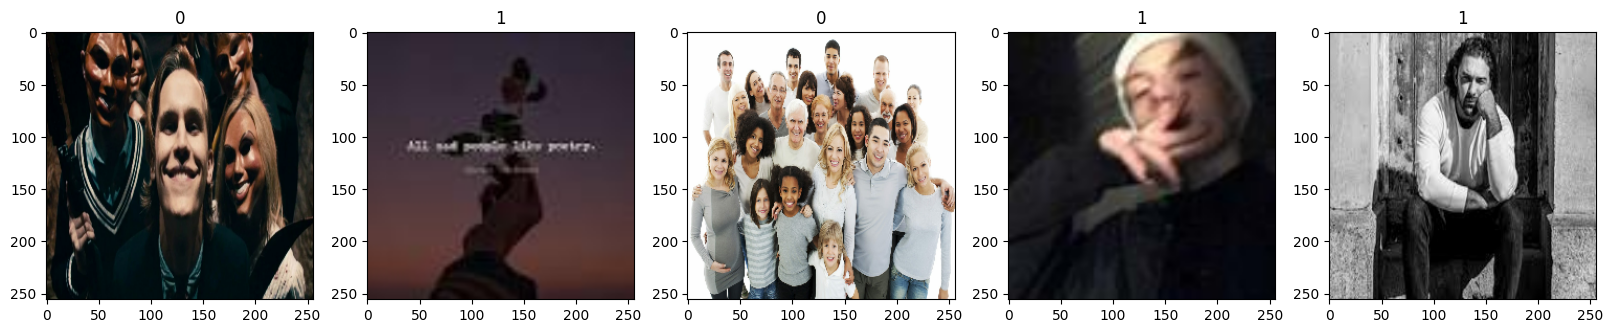

In [40]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [41]:
len(list(data))

10

In [42]:
data = data.map(lambda x,y: (x/255, y))

In [43]:
data.as_numpy_iterator().next()

(array([[[[0.24255514, 0.24255514, 0.20333946],
          [0.24033605, 0.24033605, 0.20112035],
          [0.23929067, 0.23929067, 0.20007497],
          ...,
          [0.2901961 , 0.27058825, 0.29411766],
          [0.2901961 , 0.27058825, 0.29411766],
          [0.2901961 , 0.27058825, 0.29411766]],
 
         [[0.27058825, 0.27872244, 0.23616728],
          [0.26301455, 0.27114874, 0.22859359],
          [0.26664165, 0.27450982, 0.23208767],
          ...,
          [0.2901961 , 0.27058825, 0.29411766],
          [0.2901961 , 0.27058825, 0.29411766],
          [0.2901961 , 0.27058825, 0.29411766]],
 
         [[0.25918955, 0.2763311 , 0.23924471],
          [0.26484936, 0.28159186, 0.24463849],
          [0.26110685, 0.27092525, 0.23660427],
          ...,
          [0.2901961 , 0.27058825, 0.29411766],
          [0.2901961 , 0.27058825, 0.29411766],
          [0.2901961 , 0.27058825, 0.29411766]],
 
         ...,
 
         [[0.2358472 , 0.19483924, 0.1869961 ],
          [0.23090

# Buildind the ANN Model


In [44]:
#splitting dataset
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [48]:
model = Sequential()

In [49]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Traning 

In [52]:
logdir='logs'

In [53]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [54]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-07-27 19:20:02.679955: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-07-27 19:20:21.301721: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-27 19:20:24.684047: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe93e573fc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-27 19:20:24.684221: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce 940MX, Compute Capability 5.0
2023-07-27 19:20:26.522555: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-27 19:20:30.704227: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-27 19:20:31.528092: I ./tensorflow/compiler/jit/device_compile

7/7 [==============================] - 66s 637ms/step - loss: 1.7397 - accuracy: 0.4777 - val_loss: 0.6734 - val_accuracy: 0.6250
Epoch 2/20
7/7 [==============================] - 6s 596ms/step - loss: 0.7077 - accuracy: 0.5179 - val_loss: 0.6793 - val_accuracy: 0.7344
Epoch 3/20
7/7 [==============================] - 6s 595ms/step - loss: 0.6706 - accuracy: 0.7634 - val_loss: 0.6340 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 6s 593ms/step - loss: 0.6204 - accuracy: 0.7054 - val_loss: 0.6149 - val_accuracy: 0.6094
Epoch 5/20
7/7 [==============================] - 6s 615ms/step - loss: 0.5991 - accuracy: 0.6786 - val_loss: 0.5003 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 6s 587ms/step - loss: 0.5103 - accuracy: 0.7679 - val_loss: 0.4401 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 6s 573ms/step - loss: 0.4077 - accuracy: 0.8438 - val_loss: 0.4171 - val_accuracy: 0.8125
Epoch 8/20
7/7 [==============

# Plotting the results

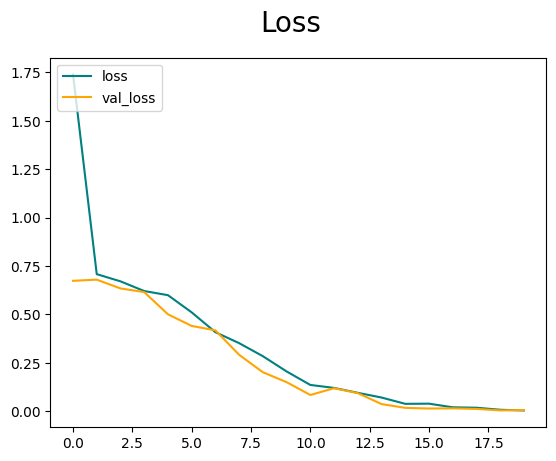

In [56]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

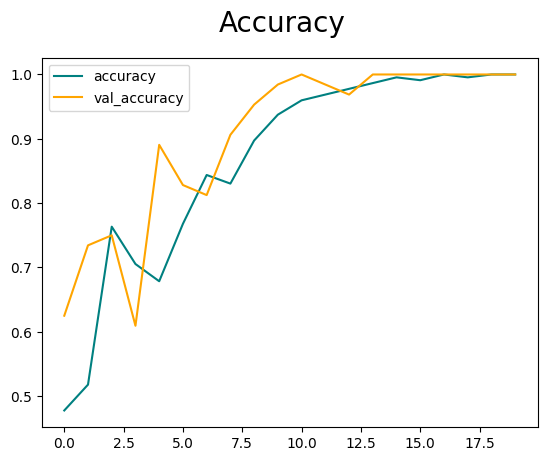

In [57]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation and Testing

In [78]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [79]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [80]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 28ms/step


In [81]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [93]:
import cv2 as cv


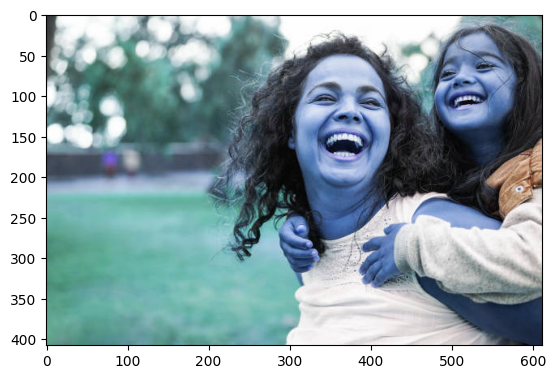

In [98]:
img2 = cv.imread("happy.jpg")
plt.imshow(img2)
plt.show()

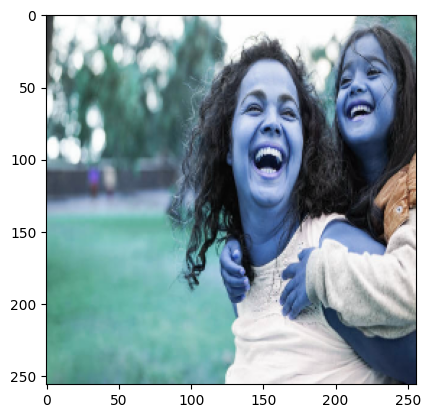

In [99]:
resize = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [100]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 25ms/step


array([[0.5293956]], dtype=float32)

In [102]:
if yhat > 0.53: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')


Predicted class is Happy
